In [ ]:
pip install -r requirements.txt # instalar requisitos

In [652]:
!pip install seaborn
!pip install scikit-learn

In [654]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [598]:
import matplotlib.ticker as ticker
sns.set(style="whitegrid")

# Definindo a formatação global para o eixo y
def format_y_axis(value, _):
    return '{:,.0f}'.format(value)

# Pré-processamento dos Dados
Carregando arquivos CSV:

In [599]:
Cars_train = pd.read_csv('/content/drive/MyDrive/dados/cars_train.csv',encoding='latin-1')
Cars_test = pd.read_csv('/content/drive/MyDrive/dados/cars_test.csv',encoding='latin-1')

# Visualizando os Dados
Como podemos vizualizar, possuimos features categóricas e númericas. Além disso, visualizar que ambos tem uma ultima linha com todas as colunas Nam, por isso, iremos remover de ambos, porque se esta coluna permanecer, existe uma mistura de tipos de dados, resultando em todas as colunas como tipo object.

In [660]:
Cars_train.head()# Exibe as primeiras linhas do DataFrame

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_Ãºnico_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fÃ¡brica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.00,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017.00,2017.00,67772.00,CVT,4.00,...,False,False,False,Todas as revisÃµes feitas pela concessionÃ¡ria,IPVA pago,Licenciado,False,False,False,74732.59
1,279639842134129588306469566150288644214,8.00,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÃTICO,2017.00,2017.00,62979.00,AutomÃ¡tica,4.00,...,False,Aceita troca,False,False,IPVA pago,False,False,False,False,81965.33
2,56414460810621048900295678236538171981,16.00,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÃTICO,2018.00,2019.00,44070.00,AutomÃ¡tica,4.00,...,False,Aceita troca,False,False,False,False,False,False,False,162824.81
3,56862509826849933428086372390159405545,14.00,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013.00,2015.00,85357.00,AutomÃ¡tica,4.00,...,False,Aceita troca,False,False,IPVA pago,Licenciado,False,False,False,123681.36
4,338980975753200343894519909855598027197,8.00,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÃTICO,2013.00,2015.00,71491.00,AutomÃ¡tica,4.00,...,False,False,False,Todas as revisÃµes feitas pela concessionÃ¡ria,False,False,Garantia de fÃ¡brica,Todas as revisÃµes feitas pela agenda do carro,False,82419.76


In [661]:
Cars_test.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_Ãºnico_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fÃ¡brica,revisoes_dentro_agenda,veiculo_alienado,preco
0,13518783164498355150900635905895481162,8.00,NISSAN,VERSA,1.6 16V FLEXSTART V-DRIVE MANUAL,2021.00,2021.00,20258.00,Manual,4.00,...,False,Aceita troca,False,False,IPVA pago,Licenciado,Garantia de fÃ¡brica,False,False,135859.45
1,299896161723793383246777788797566040330,18.00,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2021.00,2021.00,53045.00,Manual,2.00,...,False,Aceita troca,Ãnico dono,False,IPVA pago,Licenciado,False,False,False,144051.18
2,316180649972302128246133616457018378621,8.00,AUDI,Q5,2.0 TFSI GASOLINA BLACK S TRONIC,2018.00,2019.00,32486.00,AutomÃ¡tica,4.00,...,False,Aceita troca,False,False,IPVA pago,False,False,False,False,185675.15
3,222527157104148385909188217274642813298,16.00,CHEVROLET,CRUZE,1.4 TURBO LT 16V FLEX 4P AUTOMÃTICO,2019.00,2020.00,24937.00,AutomÃ¡tica,4.00,...,False,Aceita troca,Ãnico dono,False,IPVA pago,Licenciado,False,False,False,131583.87
4,160460343059850745858546502614838368036,8.00,FORD,ECOSPORT,1.5 TI-VCT FLEX SE AUTOMÃTICO,2019.00,2019.00,62074.00,AutomÃ¡tica,4.00,...,False,Aceita troca,False,False,IPVA pago,Licenciado,False,False,False,106648.88


In [601]:
# Armazena o tamanho do dataframe train
num_rows_train = len(Cars_train)
# Remove a última linha do DataFrame usando o método drop()
Cars_train = Cars_train.drop(index=num_rows_train-1)
# Armazena o tamanho do dataframe test
num_rows_test = len(Cars_test)
# Remove a última linha do DataFrame usando o método drop()
Cars_test = Cars_test.drop(index=num_rows_test-1)

**Além disso, visualizamos que temos varios colunas com linhas vazias**

In [602]:
# Preenchendo os dados vazios de ambos os datasets
Cars_train = Cars_train.fillna(False)
Cars_test = Cars_test.fillna(False)

**Retornando as informações principais dos datasets com o .info():**

In [603]:
Cars_train.info()print(data.info())    # Exibe informações sobre as colunas e tipos de dados
Cars_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29584 non-null  object 
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  float64
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  float64
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

# Observando o tipo de dados das colunas:

**De acordo com a visualização das informações, o tipo dado. Vamos trocar o tipo de num_fotos em float e dado que em algumas colunas temos algo o Falso no Lugar do vazio, iremos trocar o outro dado positivo, que são strings, por True.Logo, criamos algumas colunas boleanas.**

In [367]:
Cars_test['num_fotos']= Cars_test['num_fotos'].astype(float)
Cars_train['num_fotos'] = Cars_train['num_fotos'].astype(float)
Cars_train = Cars_train.replace({'Aceita troca': True, 'Todas as revisÃµes feitas pela concessionÃ¡ria': True, 'IPVA pago': True, 'Licenciado': True, 'Garantia de fÃ¡brica':True, 'Todas as revisÃµes feitas pela agenda do carro': True,'Ãnico dono': True})
Cars_train.info()
Cars_test = Cars_test.replace({'Aceita troca': True, 'Todas as revisÃµes feitas pela concessionÃ¡ria': True, 'IPVA pago': True, 'Licenciado': True, 'Garantia de fÃ¡brica':True, 'Todas as revisÃµes feitas pela agenda do carro':True,'Ãnico dono?':True})
Cars_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29584 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  float64
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  float64
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

# Vamos analizar agora alguns dados da coluna preco com o describe()


mean é a média, std é o desvio padrão, as porcetagens são os quartis, pois são dividas em quatro partes, onde os 50% é justamente a mediana dos dados. Top é o valor mais frequente e faz mais sentido quando se está falando de dados categóricos

In [604]:
Cars_train['preco'].describe() # Exibe as principais estatísticas descritivas das variáveis numéricas

count     29584.00
mean     133023.88
std       81662.87
min        9869.95
25%       76571.77
50%      114355.80
75%      163679.62
max     1359812.89
Name: preco, dtype: float64

** Plotando os dados de Preço vs Marca, revelando que entre os carros mais caros, o PORSCHE tem valores mais caros e o BRM tem os valores mais baixos.**

<ipython-input-574-336b0a21041d>:12: UserWarning: Glyph 139 (\x8b) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


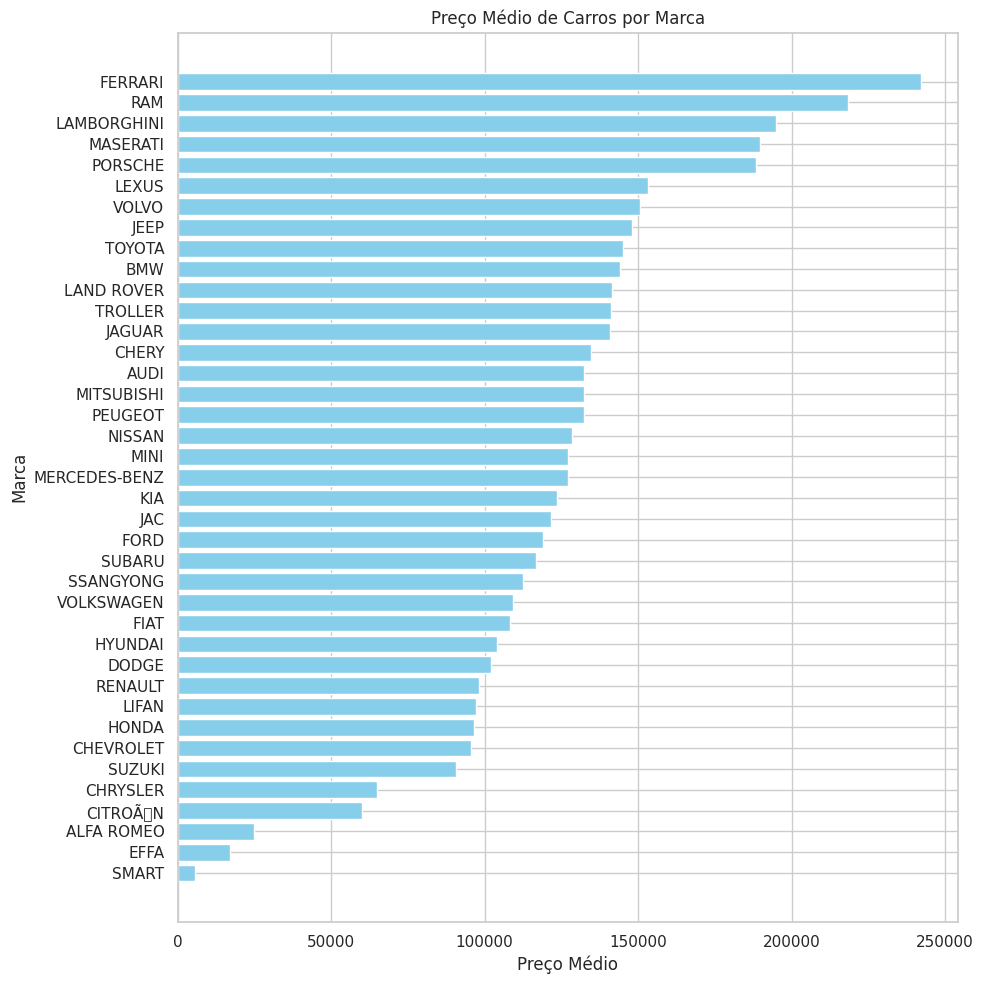

In [574]:
media_preco_por_marca = Cars_test.groupby('marca')['preco'].mean()

# Ordenar as marcas por ordem crescente de preço médio
media_preco_por_marca = media_preco_por_marca.sort_values()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 10))
plt.barh(media_preco_por_marca.index, media_preco_por_marca.values, color='skyblue')
plt.xlabel('Preço Médio')
plt.ylabel('Marca')
plt.title('Preço Médio de Carros por Marca')
plt.tight_layout()
plt.show()

Quando analizamos pelos estados, Santa Catarina se destaca pela média de preços mais altes, enquanto Roraima pela média de precos mais baratos.

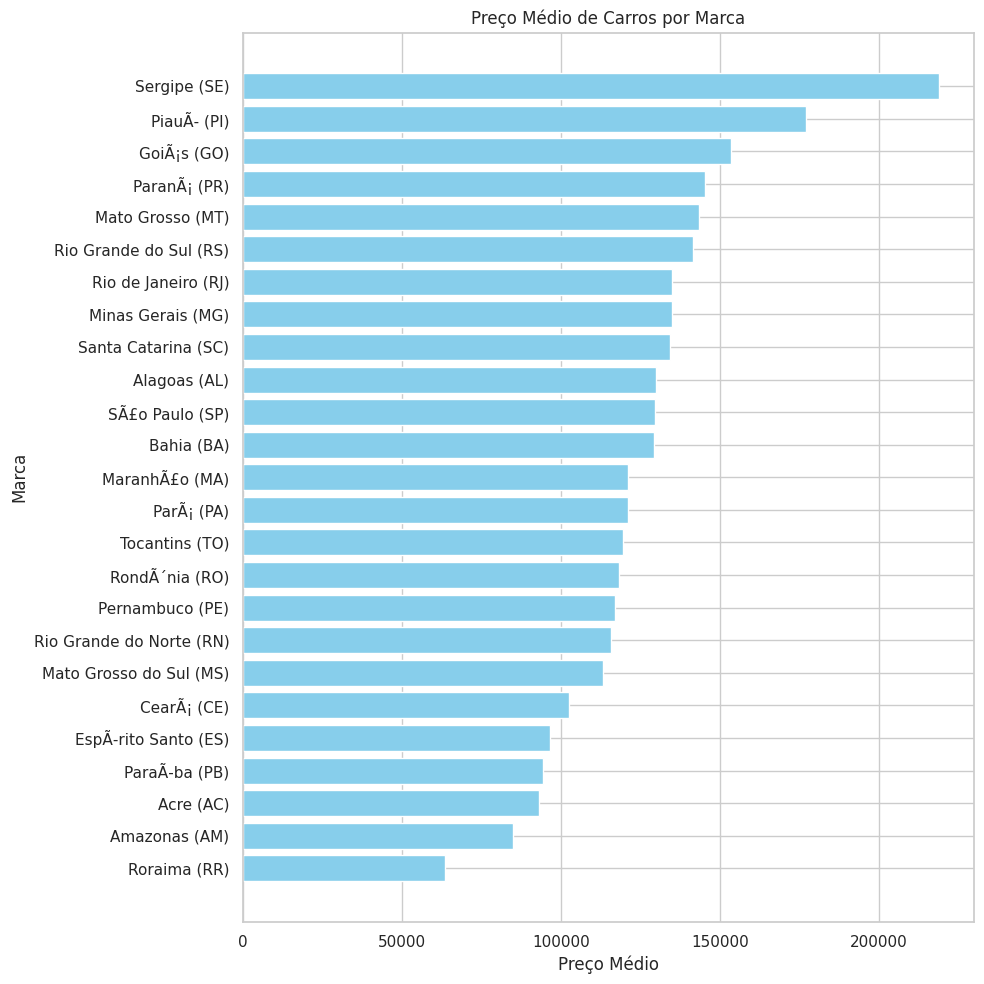

In [577]:
media_preco_por_marca = Cars_train.groupby('estado_vendedor')['preco'].mean()

# Ordenar as marcas por ordem crescente de preço médio
media_preco_por_marca = media_preco_por_marca.sort_values()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 10))
plt.barh(media_preco_por_marca.index, media_preco_por_marca.values, color='skyblue')
plt.xlabel('Preço Médio')
plt.ylabel('Marca')
plt.title('Preço Médio de Carros por Marca')
plt.tight_layout()
plt.show()

**Analisando pelo describe, exluindo os números, temos que o carro mais frequente é o WOlKSWAGEN no dataset de treino**

In [185]:
Cars_train.describe(exclude=np.number)

,id,marca,modelo,versao,cambio,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_Ãºnico_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fÃ¡brica,revisoes_dentro_agenda,veiculo_alienado
count,29584,29584,29584,29584,29584,29584,29584,29584,29584,29584,...,29584,29584,29584,29584,29584,29584,29584,29584,29584,29584
unique,29584,40,457,1916,7,7,2,7,2,575,...,2,1,2,2,2,2,2,2,2,1
top,300716223898539419613863097469899222392,VOLKSWAGEN,COMPASS,1.6 16V FLEX ALLURE PACK 4P AUTOMÃTICO,AutomÃ¡tica,SedÃ£,N,Branco,PF,SÃ£o Paulo,...,False,False,True,False,False,True,True,False,False,False
freq,1,4594,1480,1352,22545,16429,29336,20949,17926,6158,...,24523,29584,21922,19161,20412,19659,15906,25219,23674,29584


**Analizando, temos que o carro mais frequente é o VOLKSWAGEN, pois entre os 40 valores únicos, ele é o que mais se repete, sendo que dos 4594 valores, o modelo COMPASS é o mais frequente, se tornando um carro bastante polular.**

# CRIANDO 3 HÍPOTESES DE NEGÓCIO
**A média de preços de carros com transmissão automática é maior do que a média de preços de carros com transmissão manual.**

In [71]:
media_preco_auto = Cars_train[Cars_train['cambio'] == 'AutomÃ¡tica']['preco'].mean()
media_preco_manual = Cars_train[Cars_train['cambio'] == 'Manual']['preco'].mean()
print(f"Média de preço dos carros com transmissão automática: {media_preco_auto:.2f}")
print(f"Média de preço dos carros com transmissão manual: {media_preco_manual:.2f}")



Média de preço dos carros com transmissão automática: 146047.76
Média de preço dos carros com transmissão manual: 80713.06
A marca de carros mais vendida é: VOLKSWAGEN
Preço médio dos carros da marca mais vendida: 117940.09
Preço médio geral dos carros: 133023.88
Preço médio dos carros antigos (antes de 2010): 78491.32
Preço médio dos carros recentes (2010 em diante): 133034.94


**A marca de carros mais vendida é uma marca popular e tem um preço médio abaixo da média geral de preços dos carros.**

In [ ]:
marca_mais_vendida = Cars_train['marca'].value_counts().idxmax()
preco_medio_marca_mais_vendida = Cars_train[Cars_train['marca'] == marca_mais_vendida]['preco'].mean()
preco_medio_geral = Cars_train['preco'].mean()
print(f"A marca de carros mais vendida é: {marca_mais_vendida}")
print(f"Preço médio dos carros da marca mais vendida: {preco_medio_marca_mais_vendida:.2f}")
print(f"Preço médio geral dos carros: {preco_medio_geral:.2f}")

**Carros mais antigos têm preço médio mais baixo em relação aos carros mais recentes.**

In [ ]:
preco_medio_carros_antigos = Cars_train[Cars_train['ano_modelo'] < 2010]['preco'].mean()
preco_medio_carros_recentes = Cars_train[Cars_train['ano_modelo'] >= 2010]['preco'].mean()
print(f"Preço médio dos carros antigos (antes de 2010): {preco_medio_carros_antigos:.2f}")
print(f"Preço médio dos carros recentes (2010 em diante): {preco_medio_carros_recentes:.2f}")

# ESTADO BOM PARA VENDER CARRO POPULAR MAIS BARATO:
**Vamos inicialmente verificar os carros por estado:**

**Vamos pegar os 3 primeiras marcas de carros mais populares, que são: 'Volkswagen'**

<ipython-input-589-b9152384bfe2>:9: UserWarning: Glyph 139 (\x8b) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


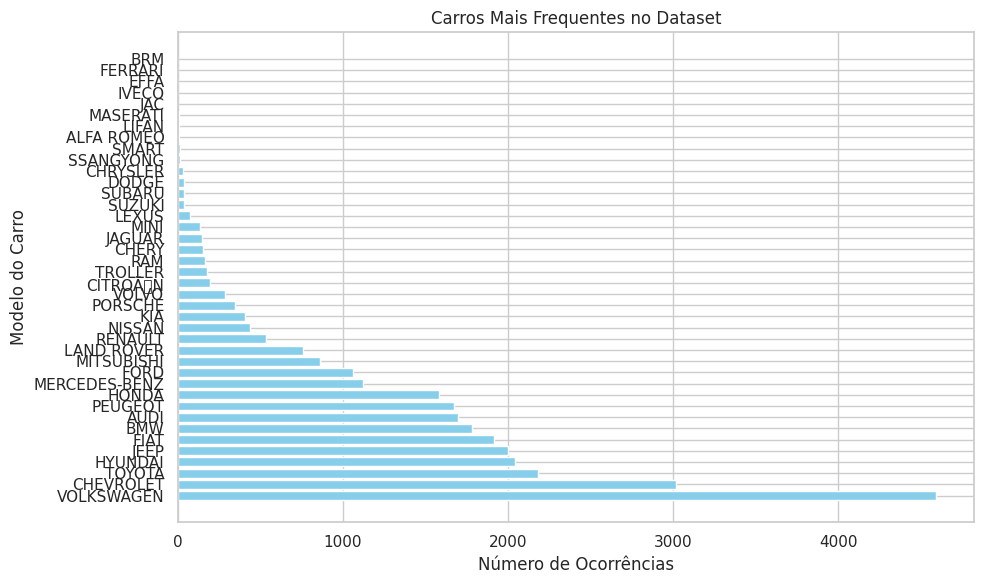

In [589]:
contagem_carros = Cars_train['marca'].value_counts()

# Plotar o gráfico de barras com os carros mais frequentes no eixo y
plt.figure(figsize=(10, 6))
plt.barh(contagem_carros.index, contagem_carros.values, color='skyblue')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Modelo do Carro')
plt.title('Carros Mais Frequentes no Dataset')
plt.tight_layout()
plt.show()

**Analizando abaixo pela frequência dos carros da marca VOLKSWAGEN por Estado, temos que São Paulo tende a ser o Estado com mais incidência de Vendas de Veículos. Logo, caso queira vender neste estado, terá bastante concorrência, mas também tende a ser mais comum a compra de carros dessa marca neste estado.**

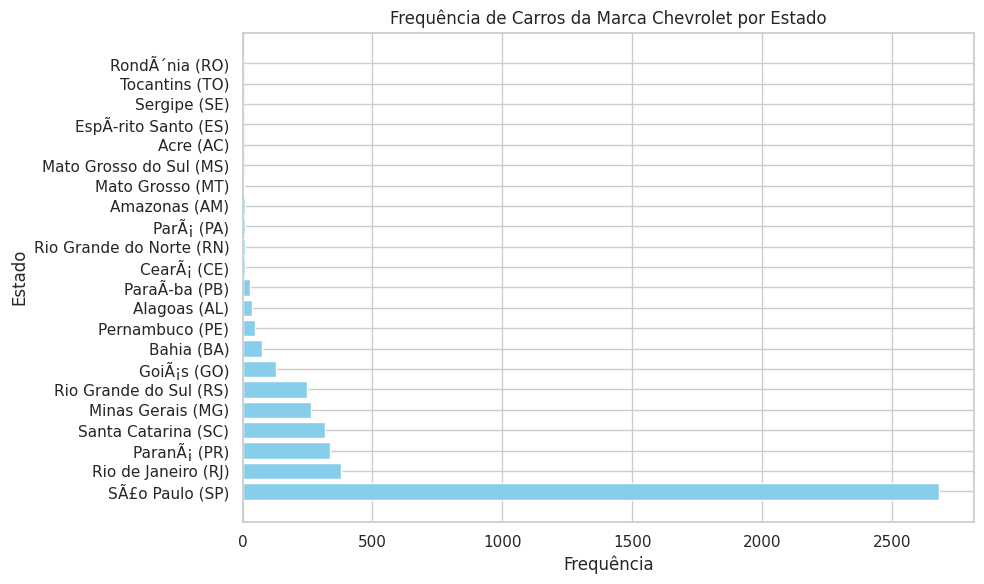

In [593]:
data_chevrolet = Cars_train[Cars_train['marca'] == 'VOLKSWAGEN']

# Calcular a frequência de carros da marca Chevrolet em cada estado
frequencia_chevrolet_por_estado = data_chevrolet['estado_vendedor'].value_counts()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(frequencia_chevrolet_por_estado.index, frequencia_chevrolet_por_estado.values, color='skyblue')
plt.xlabel('Frequência')
plt.ylabel('Estado')
plt.title('Frequência de Carros da Marca Chevrolet por Estado')
plt.tight_layout()
plt.show()

**Com isso, concluimos que São Paulo é o estado mais interessante para se vender um carro popular da marca Volkswagen.**

# MELHOR ESTADO PARA SE COMPRAR UMA PICAPE COM CÂMBIO AUTOMÁTICO
**Agora, vamos analizar qual Estado é melhor para se comprar uma PICAPE com CÂMBIO AUTOMÁTICO. Tendo em vista que o único modelo que encontramos no dataset que se refere diretamente ao nome PICAPE é PICAPE CAÇAMBA LONGA, temos os seguintes resultados:**

In [594]:
# Filtrar apenas os carros com transmissão automática
carros_cambio_automatico = Cars_train[Cars_train['cambio'] == 'AutomÃ¡tica']

# Calcular o total de picapes com transmissão automática em cada estado
total_automaticas_por_estado = carros_cambio_automatico.groupby('estado_vendedor').size()

# Calcular o total de picapes em cada estado
total_picapes_por_estado = Cars_train[Cars_train['modelo'] == 'PICAPE CAÃ\x87AMBA LONGA'].groupby('estado_vendedor').size()

# Calcular a proporção de picapes com transmissão automática em relação ao total de picapes em cada estado
proporcao_automaticas_por_estado = total_automaticas_por_estado / total_picapes_por_estado

# Encontrar o estado com a maior proporção de picapes com transmissão automática
melhor_estado = proporcao_automaticas_por_estado.idxmax()

# Exibir o resultado
print(f"O melhor estado para se comprar uma picape com transmissão automática é: {melhor_estado}")

O melhor estado para se comprar uma picape com transmissão automática é: SÃ£o Paulo (SP)


# Qual o melhor estado para se comprar carros que ainda estejam dentro a garantia de fábrica



In [70]:
carros_dentro_garantia = Cars_train[Cars_train['garantia_de_fÃ¡brica'] == True]

# Passo 2: Analisar a disponibilidade de carros com garantia por estado
total_carros_garantia_por_estado = carros_dentro_garantia['estado_vendedor'].value_counts()

# Exibir os estados e a quantidade de carros com garantia em cada estado
print(total_carros_garantia_por_estado)

SÃ£o Paulo (SP)             2307
Rio de Janeiro (RJ)          412
ParanÃ¡ (PR)                 389
Santa Catarina (SC)          330
Rio Grande do Sul (RS)       281
Minas Gerais (MG)            264
GoiÃ¡s (GO)                  186
Alagoas (AL)                  58
Bahia (BA)                    51
Pernambuco (PE)               20
ParÃ¡ (PA)                    17
Mato Grosso do Sul (MS)       13
Rio Grande do Norte (RN)       9
EspÃ­rito Santo (ES)           9
Amazonas (AM)                  9
Sergipe (SE)                   3
Mato Grosso (MT)               2
Acre (AC)                      2
CearÃ¡ (CE)                    1
Tocantins (TO)                 1
ParaÃ­ba (PB)                  1
Name: estado_vendedor, dtype: int64


**Novamente, temos São Paulo como o principal estado para venda, dado sua frequência e varieadade de carros com garantia de fábrica**

# CRIANDO MODELO PREDITIVO DE DADOS

O tipo de problema que estamos resolvendo é de regressão, pois estamos tentando prever um valor numérico contínuo (o preço dos carros) com base nas variáveis explicativas.

**Modelo que melhor se aproxima dos dados:**
A escolha do modelo depende de diversos fatores, como o volume de dados, a complexidade do problema, a interpretabilidade do modelo, entre outros. Algumas opções que optei por usar foram Regressão Linear, Árvores de Decisão, Random Forest e suas aplicações.

**Medida de performance do modelo:**
Para avaliar o desempenho do modelo de regressão, utilizei uma métrica comum é o Erro Quadrático Médio (Mean Squared Error - MSE), que mede a média dos quadrados das diferenças entre os valores reais e as previsões feitas pelo modelo. Quanto menor o MSE, melhor é o desempenho do modelo em fazer previsões mais precisas. Além disso, é comum também avaliar outras métricas, como o Coeficiente de Determinação (R²) ou o Erro Absoluto Médio (MAE), dependendo do contexto do problema.

# Carregando Dados para Análise
**Criando duas novas variáveis que erdam os dataset já formatados.**

In [634]:
New_Cars_train = Cars_train
New_Cars_test = Cars_test
New_Cars_train = New_Cars_train.drop('preco', axis=1)

**Separando as colunas Categoricas e numéricas em duas variáveis diferentes, tanto os dados de treino como o de test.**

In [635]:
train_categorial_data = New_Cars_train.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = New_Cars_train.select_dtypes(include=['int64', 'float','int32'])

test_categorial_data = New_Cars_test.select_dtypes(exclude=['int64', 'float','int32'])
test_numerical_data = New_Cars_test.select_dtypes(include=['int64', 'float','int32'])


In [636]:
test_categorial_data.info()
test_numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9862 entries, 0 to 9861
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       9862 non-null   object
 1   num_fotos                9862 non-null   object
 2   marca                    9862 non-null   object
 3   modelo                   9862 non-null   object
 4   versao                   9862 non-null   object
 5   cambio                   9862 non-null   object
 6   tipo                     9862 non-null   object
 7   blindado                 9862 non-null   object
 8   cor                      9862 non-null   object
 9   tipo_vendedor            9862 non-null   object
 10  cidade_vendedor          9862 non-null   object
 11  estado_vendedor          9862 non-null   object
 12  anunciante               9862 non-null   object
 13  entrega_delivery         9862 non-null   bool  
 14  troca                    9862 non-null  

**Observando e ouve separação dos dados. Como vemos, foram separados as features com dados float das demais colunas**

**Agora, criamos a variável com LabelEncoder para transformar os dados de string em números. Incialmente, transformamos os dados categóricos em strings, depois transformamos em números e printamos como exemplo**

In [637]:
le = LabelEncoder()
train_categorial_data = train_categorial_data.astype(str)
test_categorial_data = test_categorial_data.astype(str)
train_categorial_data = train_categorial_data.apply(LabelEncoder().fit_transform)
test_categorial_data = test_categorial_data.apply(LabelEncoder().fit_transform)
train_categorial_data

,id,num_fotos,marca,modelo,versao,cambio,tipo,blindado,cor,tipo_vendedor,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_Ãºnico_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fÃ¡brica,revisoes_dentro_agenda,veiculo_alienado
0,19447,12,27,257,424,4,5,0,0,0,...,0,0,1,0,1,1,1,0,0,0
1,17350,12,18,133,876,2,5,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,25459,6,19,378,1402,2,5,0,4,1,...,0,0,0,0,0,0,0,0,0,0
3,25503,4,38,63,1087,2,4,0,0,1,...,1,0,0,0,0,1,1,0,0,0
4,23174,12,33,259,1076,2,6,0,4,0,...,0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,23968,12,36,238,1529,2,4,0,0,0,...,0,0,0,1,0,1,1,1,0,0
29580,6283,12,38,319,22,2,4,0,0,0,...,0,0,1,1,1,1,1,1,0,0
29581,6905,12,36,238,1553,2,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29582,10581,12,28,8,394,2,5,0,0,1,...,0,0,0,1,0,1,1,0,0,0


**Agora, após a transformação, juntamos os dados novamente em outras variáveis, individualizamos o y com a variável de entrada que queremos prever e criamos uma variável chamada test_set para armazenar os dados de teste juntos novamente.**

In [639]:
X = pd.concat([train_categorial_data,train_numerical_data], axis =1)
y = Cars_train['preco']
test_set = pd.concat([test_categorial_data,test_numerical_data], axis =1)
y.head()

0    74732.59
1    81965.33
2   162824.81
3   123681.36
4    82419.76
Name: preco, dtype: float64

**Vamos separar nosso conjunto em treinamento e validação, faz isso para validar o modelo nos dados de treino. Porque se for aplicano no modelos de test, pode acabar sobreajustanto para os dados de teste e queremos que nosso modelo tenha uma capacidade de generalização e para isso precisamos testar em dados que eles nao viu. Para isso, separamos nosso modelo que já temos em teste e validação Logo, iremos separar abaixo 80% dos dados para treinamento e 20% para validação.**

In [640]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

**Vamos observar o tamanho dos dados separados que criamos**

In [641]:
print("O tamanho da entrada de treino é:", X_train.shape)
print("O tamanho da saida de treino é:", y_train.shape)
print("O tamanho da entrada de test é:", X_test.shape)
print("O tamanho da saida de treino é:", y_test.shape)

O tamanho da entrada de treino é: (20708, 28)
O tamanho da saida de treino é: (20708,)
O tamanho da entrada de test é: (8876, 28)
O tamanho da saida de treino é: (8876,)


# Construção de Máquinas Preditivas

Criando o odelo com regrassão linear, após isso, treino o modelo e depois crio a previsão de preços utilizando o modelo criado e usando como referência nosso test_set, que seria nossos dados já formatados, com as colunas mais pertinentes, considerando minha escolha.

In [642]:
# Inicializar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Fazer previsões usando o conjunto de teste
y_pred_transformed = model.predict(test_set)
y_pred_test = y_pred_transformed

# Prevendo Métricas de Desempenho

**MSE (Mean Squared Error):** O erro médio quadrático é uma medida que quantifica a diferença entre os valores reais e os valores previstos pelo modelo. Quanto menor o MSE, melhor o modelo se ajusta aos dados.

**MAE (Mean Absolute Error):** O erro médio absoluto é uma métrica que também mede a diferença entre os valores reais e os valores previstos pelo modelo. No entanto, ao contrário do MSE, o MAE não penaliza grandes erros, tornando-se uma medida mais robusta para avaliar o desempenho do modelo em relação aos valores extremos.

**R² (R-squared):** O coeficiente de determinação R² é uma medida de quão bem os valores previstos pelo modelo se ajustam aos valores reais. Ele varia de 0 a 1, e um valor mais próximo de 1 indica um bom ajuste do modelo aos dados, enquanto um valor mais próximo de 0 indica um ajuste insatisfatório.

**Os resultados que obtive abaixo foram os melhores que consegui, alterando e testando diversas vezes. Peço compreenssão caso não seja o esperado, pois ainda estou me adaptando a utilizar o modelo preditivo. Passar nesse curso é justamente a oportunidade de explorar e ampliar essas habilidades.**

In [643]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Exibir as métricas de desempenho
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

MSE: 3464326514.89
MAE: 42367.99
R²: 0.47


**Criando dataset final, adicionando a coluna preço recem criada. Após isso, fazemos uma ordenação dos dados por preço.**

In [644]:
data_final = Cars_test
data_final['preco'] = y_pred_test
dados_carros_ordenado = data_final.sort_values(by='preco')

# Exibir o DataFrame ordenado
dados_carros_ordenado.tail()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_Ãºnico_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fÃ¡brica,revisoes_dentro_agenda,veiculo_alienado,preco
6312,269651796054189186746955682493218044010,8.00,FORD,RANGER,3.2 LIMITED 4X4 CD 20V DIESEL 4P AUTOMÃTICO,2021.00,2021.00,4691.00,AutomÃ¡tica,2.00,...,False,Aceita troca,Ãnico dono,Todas as revisÃµes feitas pela concessionÃ¡ria,IPVA pago,Licenciado,Garantia de fÃ¡brica,Todas as revisÃµes feitas pela agenda do carro,False,298111.49
2647,234100436187277633790354177365217149177,8.00,PORSCHE,911,3.0 24V H6 GASOLINA CARRERA PDK,2021.00,2021.00,1206.00,AutomÃ¡tica,2.00,...,False,Aceita troca,Ãnico dono,Todas as revisÃµes feitas pela concessionÃ¡ria,IPVA pago,Licenciado,Garantia de fÃ¡brica,Todas as revisÃµes feitas pela agenda do carro,False,299616.75
5851,23193814546699547828670977067096954454,15.00,PORSCHE,CAYENNE,3.0 V6 GASOLINA COUPÃ AWD TIPTRONIC S,2020.00,2020.00,7366.00,AutomÃ¡tica,4.00,...,False,Aceita troca,Ãnico dono,Todas as revisÃµes feitas pela concessionÃ¡ria,IPVA pago,Licenciado,Garantia de fÃ¡brica,False,False,306056.05
2398,311969399547606392508138979724719015898,8.00,PORSCHE,CAYENNE,3.0 V6 E-HYBRID AWD TIPTRONIC S,2021.00,2021.00,7895.00,AutomÃ¡tica,4.00,...,False,Aceita troca,False,False,IPVA pago,Licenciado,Garantia de fÃ¡brica,False,False,306516.61
3269,230702635492489433699092885888302644869,8.00,RAM,1500,5.7 V8 GASOLINA REBEL CD 4X4 AUTOMÃTICO,2021.00,2021.00,10165.00,AutomÃ¡tica,4.00,...,False,Aceita troca,False,False,False,False,Garantia de fÃ¡brica,False,False,321939.80


# PLOTANDO OS DADOS DO DATASET FINAL ORDENANDO PELA MÉDIA DE PREÇOS E MARCA

<ipython-input-645-ee3d74db59ce>:12: UserWarning: Glyph 139 (\x8b) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


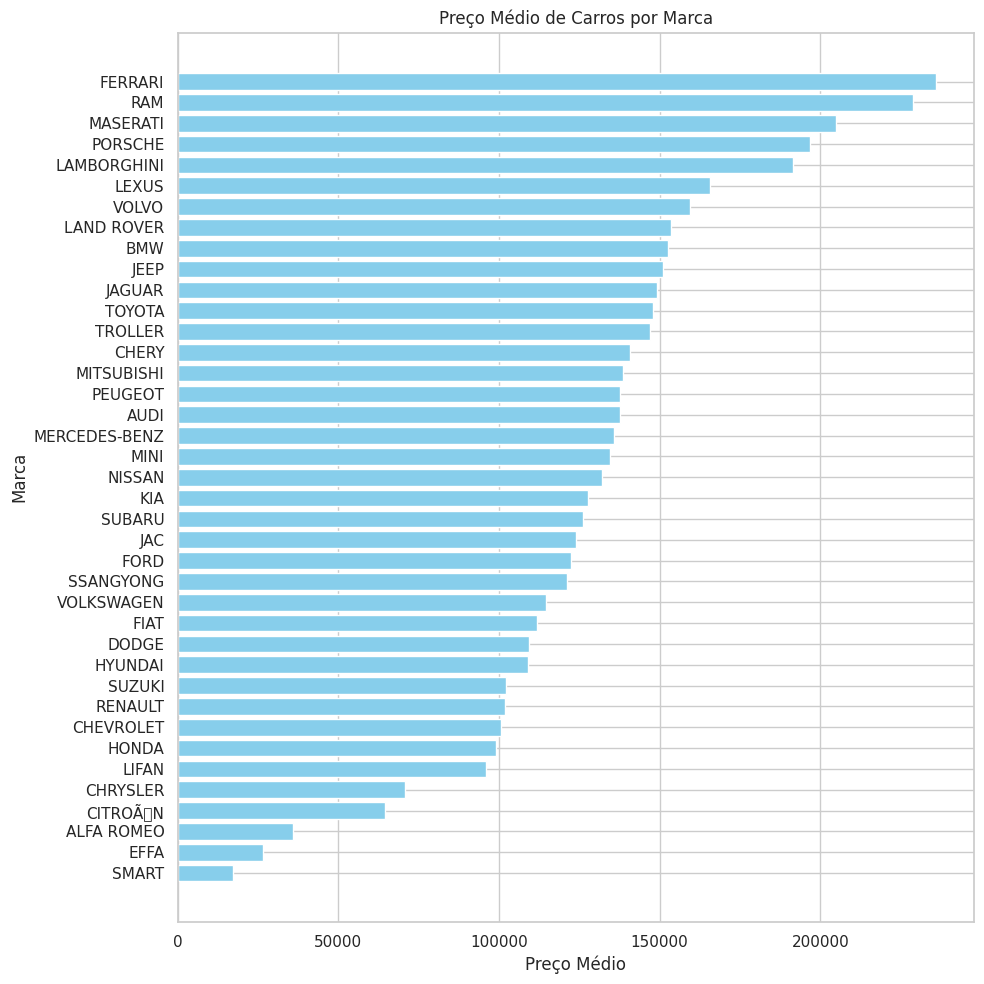

In [645]:
media_preco_por_marca = data_final.groupby('marca')['preco'].mean()

# Ordenar as marcas por ordem crescente de preço médio
media_preco_por_marca = media_preco_por_marca.sort_values()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 10))
plt.barh(media_preco_por_marca.index, media_preco_por_marca.values, color='skyblue')
plt.xlabel('Preço Médio')
plt.ylabel('Marca')
plt.title('Preço Médio de Carros por Marca')
plt.tight_layout()
plt.show()


 # PLOTANDO OS DADOS DO DATASET DE TREINO ORDENANDO PELA MÉDIA DE PREÇOS E MARCA A TITULO DE COMPARAÇÃO

<ipython-input-646-1782efb15d45>:12: UserWarning: Glyph 139 (\x8b) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


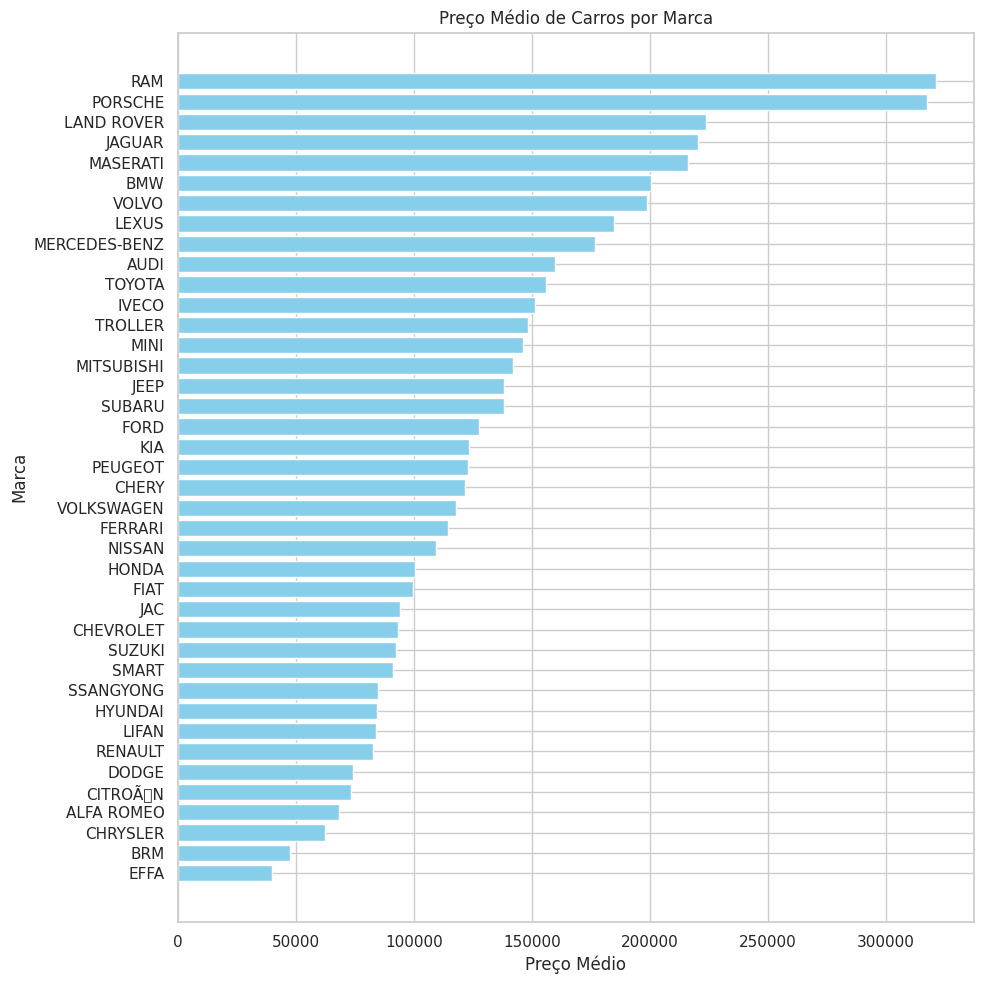

In [646]:
media_preco_por_marca = Cars_train.groupby('marca')['preco'].mean()

# Ordenar as marcas por ordem crescente de preço médio
media_preco_por_marca = media_preco_por_marca.sort_values()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 10))
plt.barh(media_preco_por_marca.index, media_preco_por_marca.values, color='skyblue')
plt.xlabel('Preço Médio')
plt.ylabel('Marca')
plt.title('Preço Médio de Carros por Marca')
plt.tight_layout()
plt.show()

In [658]:
# Armazenando od requisitos do projeto
!pip freeze > requirements.txt

In [659]:
# Criando arquivo csv com as colunas id e preco
arquivo = data_final[['id','preco']]
arquivo.to_csv('predicted.csv', index=False)